# Candlestick High Wave

https://patternswizard.com/high-wave-candlestick-pattern/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2018-01-01'
end = '2021-10-08'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,10.42,11.02,10.34,10.98,10.98,44146300
2018-01-03,11.61,12.14,11.36,11.55,11.55,154066700
2018-01-04,12.10,12.43,11.97,12.12,12.12,109503000
2018-01-05,12.19,12.22,11.66,11.88,11.88,63808900
2018-01-08,12.01,12.30,11.85,12.28,12.28,63346000


## Candlestick with High Wave

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,736696.0,10.42,11.02,10.34,10.98,10.98,44146300,True
1,736697.0,11.61,12.14,11.36,11.55,11.55,154066700,False
2,736698.0,12.10,12.43,11.97,12.12,12.12,109503000,True
3,736699.0,12.19,12.22,11.66,11.88,11.88,63808900,False
4,736702.0,12.01,12.30,11.85,12.28,12.28,63346000,True


Text(0, 0.5, 'Price')

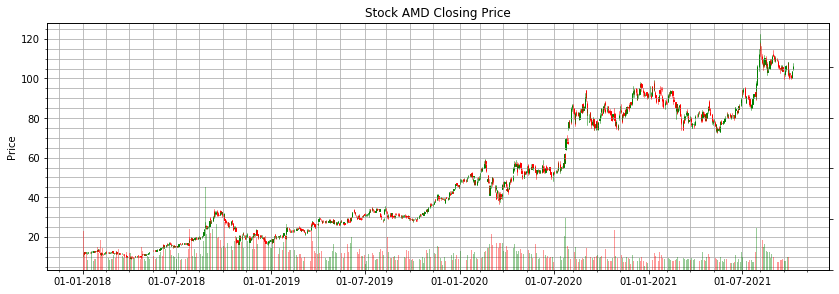

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
high_wave = talib.CDLHIGHWAVE(df['Open'], df['High'], df['Low'], df['Close'])

high_wave = high_wave[high_wave != 0]

In [6]:
df['high_wave'] = talib.CDLHIGHWAVE(df['Open'], df['High'], df['Low'], df['Close'])

In [7]:
df.loc[df['high_wave'] !=0]

,Open,High,Low,Close,Adj Close,Volume,high_wave
Date,,,,,,,
2018-01-22,12.610000,12.740000,12.370000,12.650000,12.650000,34758600,100
2018-02-22,11.820000,12.000000,11.630000,11.840000,11.840000,37886300,100
2018-03-13,11.500000,12.040000,11.100000,11.640000,11.640000,174302600,100
2018-03-15,11.430000,11.550000,11.190000,11.460000,11.460000,66373900,100
2018-03-16,11.490000,11.550000,11.320000,11.470000,11.470000,37591000,-100
...,...,...,...,...,...,...,...
2021-08-19,103.320000,106.180000,101.980003,103.699997,103.699997,71117500,100
2021-08-25,108.129997,109.910004,107.449997,108.300003,108.300003,45485500,100
2021-09-14,105.519997,106.820000,104.419998,105.730003,105.730003,40629500,100


In [8]:
df['Adj Close'].loc[df['high_wave'] !=0]

Date
2018-01-22     12.650000
2018-02-22     11.840000
2018-03-13     11.640000
2018-03-15     11.460000
2018-03-16     11.470000
                 ...    
2021-08-19    103.699997
2021-08-25    108.300003
2021-09-14    105.730003
2021-09-20    101.550003
2021-10-01    102.449997
Name: Adj Close, Length: 105, dtype: float64

In [9]:
df['Adj Close'].loc[df['high_wave'] !=0].index

DatetimeIndex(['2018-01-22', '2018-02-22', '2018-03-13', '2018-03-15',
               '2018-03-16', '2018-03-19', '2018-04-05', '2018-05-03',
               '2018-05-17', '2018-05-22',
               ...
               '2021-06-18', '2021-06-23', '2021-07-20', '2021-07-26',
               '2021-08-11', '2021-08-19', '2021-08-25', '2021-09-14',
               '2021-09-20', '2021-10-01'],
              dtype='datetime64[ns]', name='Date', length=105, freq=None)

In [10]:
high_wave

Date
2018-01-22    100
2018-02-22    100
2018-03-13    100
2018-03-15    100
2018-03-16   -100
             ... 
2021-08-19    100
2021-08-25    100
2021-09-14    100
2021-09-20   -100
2021-10-01   -100
Length: 105, dtype: int32

In [11]:
high_wave.index

DatetimeIndex(['2018-01-22', '2018-02-22', '2018-03-13', '2018-03-15',
               '2018-03-16', '2018-03-19', '2018-04-05', '2018-05-03',
               '2018-05-17', '2018-05-22',
               ...
               '2021-06-18', '2021-06-23', '2021-07-20', '2021-07-26',
               '2021-08-11', '2021-08-19', '2021-08-25', '2021-09-14',
               '2021-09-20', '2021-10-01'],
              dtype='datetime64[ns]', name='Date', length=105, freq=None)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,high_wave
Date,,,,,,,
2018-01-02,10.420000,11.020000,10.340000,10.980000,10.980000,44146300,0
2018-01-03,11.610000,12.140000,11.360000,11.550000,11.550000,154066700,0
2018-01-04,12.100000,12.430000,11.970000,12.120000,12.120000,109503000,0
2018-01-05,12.190000,12.220000,11.660000,11.880000,11.880000,63808900,0
2018-01-08,12.010000,12.300000,11.850000,12.280000,12.280000,63346000,0
...,...,...,...,...,...,...,...
2021-10-01,102.599998,103.000000,100.639999,102.449997,102.449997,41491600,-100
2021-10-04,101.739998,101.849998,99.820000,100.339996,100.339996,41967100,0
2021-10-05,100.919998,102.870003,100.610001,101.809998,101.809998,31455200,0


Text(0, 0.5, 'Price')

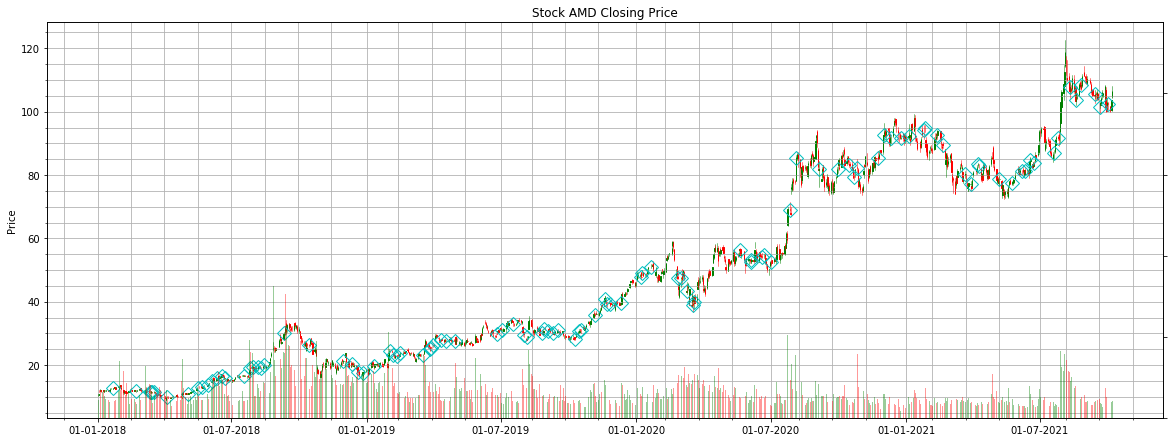

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['high_wave'] !=0].index, df['Adj Close'].loc[df['high_wave'] !=0],
                'Dc', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=10.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [14]:
df = df['2021-09-01':'2021-10-31']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,high_wave,VolumePositive
0,738034.0,111.300003,111.849998,109.849998,109.989998,109.989998,38579600,0,False
1,738035.0,110.320000,110.879997,108.769997,109.199997,109.199997,40090500,0,False
2,738036.0,108.849998,111.169998,108.500000,109.919998,109.919998,42605800,0,True
3,738040.0,109.959999,110.580002,108.660004,109.150002,109.150002,28815200,0,False
4,738041.0,108.879997,109.300003,105.519997,106.169998,106.169998,43067900,0,False


Text(0, 0.5, 'Price')

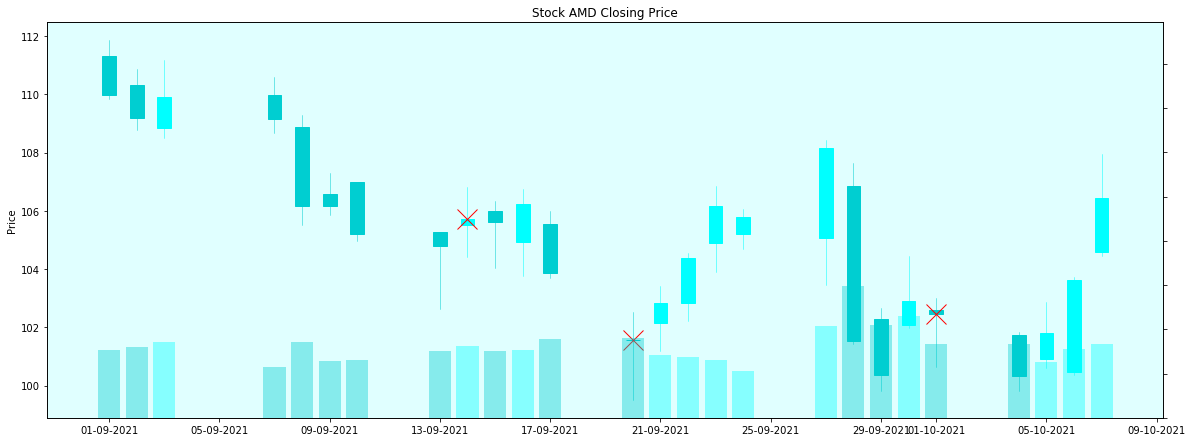

In [15]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('lightcyan')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='aqua', colordown='darkturquoise', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['high_wave'] !=0].index, df['Adj Close'].loc[df['high_wave'] !=0],
                'xr', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=20.0) 
colors = dfc.VolumePositive.map({True: 'aqua', False: 'darkturquoise'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

# Highlight Candlestick

Text(0, 0.5, 'Price')

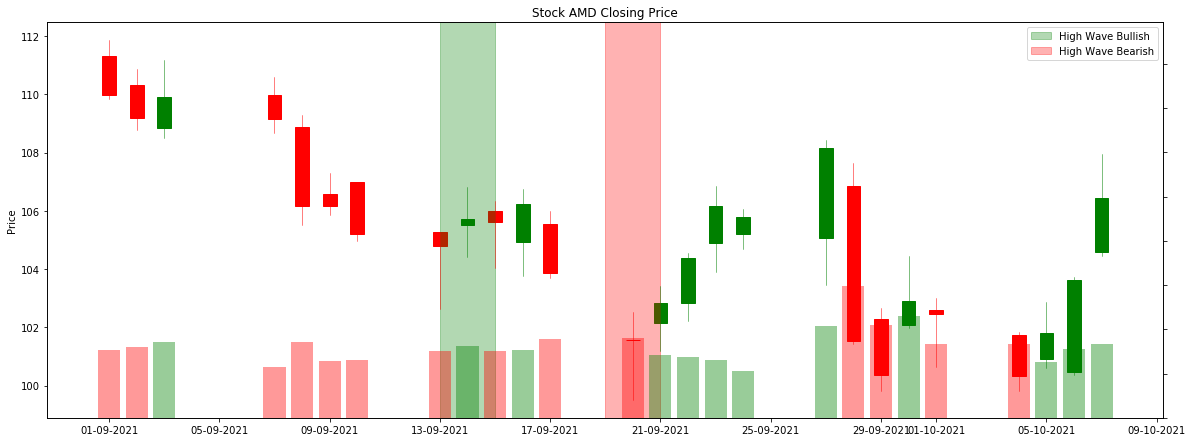

In [16]:
from matplotlib.dates import date2num
from datetime import datetime

fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.axvspan(date2num(datetime(2021,9,13)), date2num(datetime(2021,9,15)), 
           label="High Wave Bullish",color="green", alpha=0.3)
ax.axvspan(date2num(datetime(2021,9,19)), date2num(datetime(2021,9,21)), 
           label="High Wave Bearish",color="red", alpha=0.3)
ax.legend()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')